Here, we will visualise matrix linear and affine transformations to set the foundation in understanding more computer vision techniques <br>
Prerequisites are core mathematical concepts in matrices and vectors. I recommend [Precalculus course](https://www.khanacademy.org/math/precalculus) and [Linear algebra course](https://www.khanacademy.org/math/linear-algebra)


# Linear vs Affine transform

Linear transformations are fixed around the origin (scaling, rotating, skewing). Affine transformations are a linear function followed by a translation operation.

# First visualising a matrix in pyplot

Points in 2D space can be written as tuples of (3, 13), (5, 15), etc. A set of 2D vectors can be written as a matrix

\begin{bmatrix}
3 & 5 \\
13 & 15
\end{bmatrix}

with each column representing a data point. So lets say matrix A consists of 4 points

\begin{bmatrix}
0 &  0 & 20 & 20\\
0 & 20 & 20 & 0
\end{bmatrix}

In [303]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

In [304]:
def plot_points(matrix, ls='dashed', lw=1.2, colors=None):
    if matrix.shape[0] == 3:
         x, y, z   = matrix
        
    else:
         x, y   = matrix
    size   = len(x)
    colors = ['red', 'green', 'blue', 'orange'] if not None else colors
    for i in range(size):
        plt.plot(x[i], y[i], color=colors[i], marker='.')
        
        plt.plot( [x[i], x[(i+1) % size]], 
                  [y[i], y[(i+1) % size]], 
                  color=colors[i], 
                  linestyle=ls, 
                  linewidth=lw)
    plt.ylim([-5, 50])
    plt.xlim([-5, 50])
    plt.axes().set_aspect('equal')
 

Now lets create a matrix. It will be visualised as the corners of a square

c:\python37\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


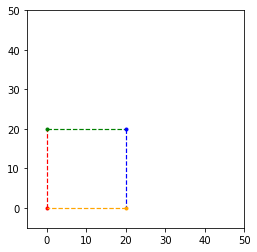

In [305]:
x_points = np.array([0,0,20,20])
y_points = np.array([0,20,20,0])
matrix   = np.array([x_points, y_points])
colors   = ['red', 'green', 'blue', 'orange']
plot_points(matrix)

plt.show()

## Identity matrix

In linear algebra, the identity matrix, or sometimes called a <code>**unit matrix**</code>, of size n is the n × n <code>**square matrix**</code> with ones on the main diagonal and zeros elsewhere.

\begin{bmatrix}
1 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 1
\end{bmatrix}

Multiplying a matrix with the identity matrix does nothing to the matrix.

\begin{equation}
\begin{bmatrix}
1 & 0\\
0 & 1 
\end{bmatrix}
\begin{bmatrix}3 \\ 13 \end{bmatrix}
=
\begin{bmatrix}
3 \\
13
\end{bmatrix}
\end{equation}

Each column in the indentity matrix are called basis vectors (linearly independent and equations solve for 0). These will be super useful in deriving and visualising the transformation matrices. More information about this type of matrixes read [here](https://en.wikipedia.org/wiki/Identity_matrix)

## Scaling

Lets say we want to scale our points by <code>**2**</code>

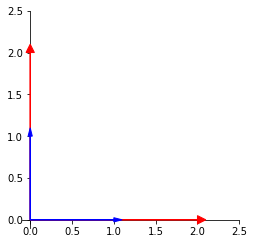

In [306]:
ax = plt.axes()
ax.arrow(0, 0, 1, 0, head_width=0.05, head_length=0.1, fc='b', ec='b', zorder=20)
ax.arrow(0, 0, 0, 1, head_width=0.05, head_length=0.1, fc='b', ec='b', zorder=20)
ax.arrow(0, 0, 2, 0, head_width=0.1,  head_length=0.1, fc='r', ec='r', zorder=10)
ax.arrow(0, 0, 0, 2, head_width=0.1,  head_length=0.1, fc='r', ec='r', zorder=10)
 
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_aspect('equal')
plt.ylim([-0.1,2.5])
plt.xlim([-0.1,2.5])
plt.show()

This plot shows the identity matrix in blue and our end goal in red.<br>
The first vector along the <code>**X**</code>axis  has to be multipled by 2 to get to scaled vector
\begin{equation}
\vec{p}=
\begin{bmatrix}1 \\ 0 \end{bmatrix}
\times 2 =
\begin{bmatrix}2 \\ 0 \end{bmatrix}
\end{equation}

The same is applied to the second vector along the y axis so our end matrix looks like:

\begin{bmatrix}
2 & 0\\
0 & 2 
\end{bmatrix}


To generalise, we can multiply a matrix by 
\begin{bmatrix}
k_1 & 0\\
0 & k_2
\end{bmatrix}

To achieve a scaling in 2D space. <code>**k1**</code> and <code>**k2**</code> can be the same or different to obtain different scalings in the different dimensions (axis)

Lets try scaling our matrix <code>**P**</code> by multiplying it with the matrix:
\begin{equation}
\begin{bmatrix}
1.5 & 0\\
0 & 2 
\end{bmatrix}
\times 
\begin{bmatrix}
0 &  0 & 20 & 20\\
0 & 20 & 20 & 0
\end{bmatrix} =
\begin{bmatrix}
0 &  0 & 30 & 30\\
0 & 40 & 40 & 0
\end{bmatrix}
\end{equation}

[[ 0.  0. 30. 30.]
 [ 0. 40. 40.  0.]]


c:\python37\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


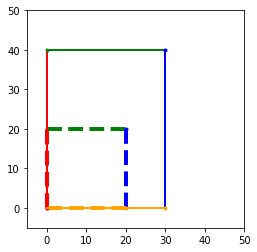

In [307]:
A = np.array([[1.5,0],[0,2]])
scalled = A.dot(matrix)
print(scalled)
plot_points(matrix, ls='dashed', lw=4)
plot_points(scalled, ls='solid', lw=2)

plt.show()

## Reflecting

We can reflect the points along the <code>**x**</code> and <code>**y**</code> axis by multiplying all coordinates by -1, -1. So, (1, 1) becomes (-1, -1). <br>
That means we can multiply a matrix to mirror allong the <code>**x**</code> and <code>**y**</code> axis.


\begin{equation}
\begin{bmatrix}
-1 & 0\\
0 & -1 
\end{bmatrix}
\times 
\begin{bmatrix}
0 &  0 & 20 & 20\\
0 & 20 & 20 & 0
\end{bmatrix} =
\begin{bmatrix}
0 &  0 & -20 & -20\\
0 & -20 & -20 & 0
\end{bmatrix}
\end{equation}

[[  0   0 -20 -20]
 [  0 -20 -20   0]]


c:\python37\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


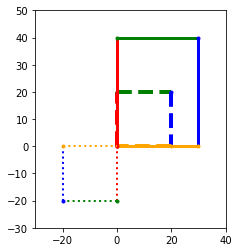

In [308]:
B = np.array([[-1,0],[0,-1]])
mirror = B.dot(matrix)
print(mirror)
plot_points(matrix, ls='dashed', lw=4)
plot_points(scalled, ls='solid', lw=3)
plot_points(mirror,  ls='dotted', lw=2)
plt.ylim([-30, 50])
plt.xlim([-30, 40])
plt.show()

## Skewing

Lets skew the identity matrix by +50%. The vector along the <code>**x**</code> axis stays the same while the vector along the <code>**y**</code> axis shifts <code>**k**</code> = 0.5 to the right. Our resultant matrix is now <br>

\begin{equation}
\begin{bmatrix}
1 & 0.5\\
0 & 1 
\end{bmatrix}
\end{equation}

and a skewing transformation matrix can be generalised as:
\begin{equation}
\begin{bmatrix}
1 & k\\
0 & 1 
\end{bmatrix}
\end{equation}

So, doing:

\begin{equation}
\begin{bmatrix}
1 & 0.5\\
0 & 1 
\end{bmatrix}
\times 
\begin{bmatrix}
0 &  0 & 20 & 20\\
0 & 20 & 20 & 0
\end{bmatrix}
\end{equation}

we will skew <code>**P**</code> by 50%

[[ 0. 10. 30. 20.]
 [ 0. 20. 20.  0.]]


c:\python37\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


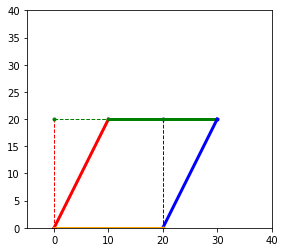

In [309]:
C = np.array([[1, 0.5],[0, 1]])
skew = C.dot(matrix)
print(skew)

plot_points(matrix, ls='dashed', lw=1)
plot_points(skew,  ls='solid', lw=3)
plt.ylim([0, 40])
plt.xlim([-5, 40])
plt.show()

## Rotating

Using the trusty [SOH CAH TOA](https://www.mathsisfun.com/algebra/sohcahtoa.html) acronym, we can see that (1, 0) on the x axis lands on <code>**(cosθ, sinθ)**</code> and (0, 1) on the y axis lands on <code>**(-sinθ, cosθ)**</code> when rotated by <code>**positive θ , counter clockwise !**</code> thus our rotating transformation matrix has the general form of
\begin{bmatrix}
cosθ & sinθ\\
-sinθ & cosθ 
\end{bmatrix}

Lets plot our matrix P when it is rotated by <code>**−30∘**</code>. 
### Note the change in negative <code>**sin**</code> for clockwise rotation. 

\begin{bmatrix}
cosθ & -sinθ\\
sinθ & cosθ 
\end{bmatrix}
Our matrices involved in this transformation are

\begin{equation}
\begin{bmatrix}
0.86 & 0.5\\
-0.5 & 0.86 
\end{bmatrix}
\times 
\begin{bmatrix}
0 &  0 & 20 & 20\\
0 & 20 & 20 & 0
\end{bmatrix}=
\begin{bmatrix}
0 &  10 & 27.32 & 17.32\\
0 & 17.32 & 7.32 & -10
\end{bmatrix}
\end{equation}

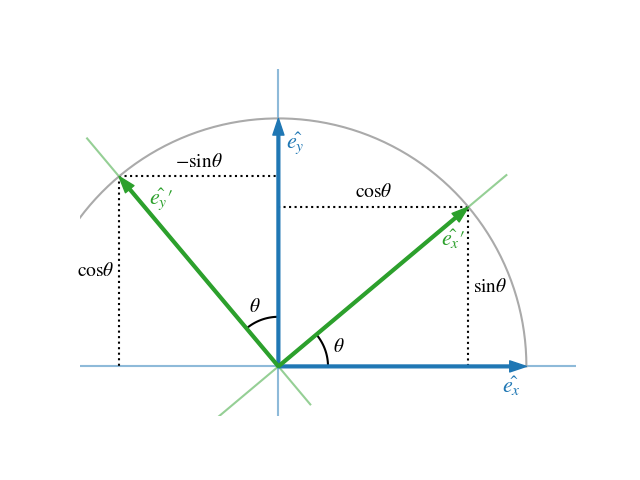

[[  0.          10.          27.32050808  17.32050808]
 [  0.          17.32050808   7.32050808 -10.        ]]


c:\python37\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


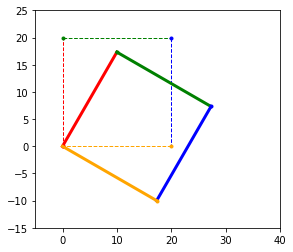

In [310]:
theta = np.radians(-30)
c, s = np.cos(theta), np.sin(theta)
D = np.array([
    [c, -s],
    [s, c ]
])
rotate = D.dot(matrix)
print(rotate)
plot_points(matrix, ls='dashed', lw=1)
plot_points(rotate, ls='solid', lw=3)
plt.ylim([-15, 25])
plt.xlim([-5, 40])
plt.show()

## Translating

We can translate points in the (x,y) plane to a new position by adding translation amounts to the coordinates of the points. For each point <code>**P(x,y)**</code> to be moved by t units parallel to the coresponding axis to the new point <code>**P'(x',y')**</code>
\begin{equation}
x' = x + t_x
\\
y' = y + t_y
\end{equation}

If we define the column vectors:
\begin{equation}
P=
\begin{bmatrix}x \\ y \end{bmatrix}
,
P'=
\begin{bmatrix}x' \\ y' \end{bmatrix}
,
T=
\begin{bmatrix}t_x \\ t_y \end{bmatrix}
\end{equation}

So this equation can be expressed as 
<code>**P' = P + T**</code>

The <code>**homogeneous coordinates**</code>that will be explained later, for  affine transform to translate a matrix we need to represent a 2 vector <code>**(x,y)**</code> to a 3 vector <code>**(x,y,1)**</code><br>
A translation matrix has the form of

\begin{bmatrix}
1 & 0 & t_x\\
0 & 1 & t_y\\
0 & 0 & 1
\end{bmatrix} 
where <code>**t1**</code> and <code>**t2**</code>  translates a vector in the x and y directions

Lets translate our original matrix to the left by 75% and downwards by 25%. Unlike the linear transformations where the scalars are multipliers, the affine scalars specify the distance to be translated.
\begin{equation}
\begin{bmatrix}
1 & 0 & (-0.75*20)\\
0 & 1 & (-0.25*20)\\
0 & 0 & 1
\end{bmatrix}
\times 
\begin{bmatrix}
0 &  0 & 20 & 20\\
0 & 20 & 20 & 0\\
1 & 1 & 1 & 1
\end{bmatrix}=
\begin{bmatrix}
-15 & -15 & 5 & 5\\
-5 & 15 & 15 & -5\\
1 & 1 & 1 & 1
\end{bmatrix}
\end{equation}


[[-15 -15   5   5]
 [ -5  15  15  -5]
 [  1   1   1   1]]


c:\python37\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


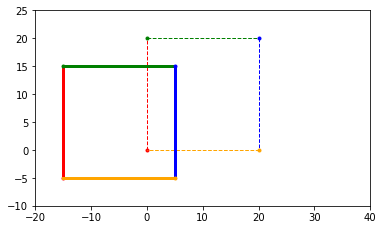

In [311]:
A = np.array([
    [1, 0, -15], 
    [0, 1, -5], 
    [0, 0, 1]
]) 
P = np.array([
    [0, 0, 20, 20], 
    [0, 20, 20, 0], 
    [1, 1, 1, 1]
]) 


translated = A.dot(P) 
print(translated)
plot_points(matrix, ls='dashed', lw=1)
plot_points(translated, ls='solid', lw=3)
plt.ylim([-10, 25])
plt.xlim([-20, 40])
plt.show()

## Summary




In [312]:
interact(f, x=10);

NameError: name 'f' is not defined

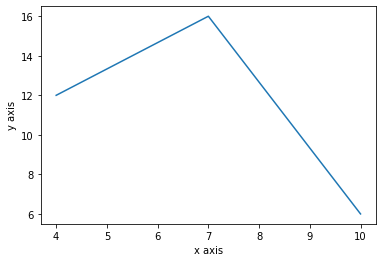

In [313]:
x = [4,7,10]
y = [12,16, 6]
plt.plot(x,y)
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.show()